## Regressão Logística

A Regressão Logística é um algoritmo de aprendizado **supervisionado** utilizado para tarefas de classificação **binária**. Apesar do nome "regressão", seu objetivo principal não é prever valores contínuos, mas sim modelar a probabilidade de uma amostra pertencer a uma determinada classe.

Carregando o dataset MNIST...
Dados de treinamento: (60000, 28, 28) (60000,)
Dados de teste: (10000, 28, 28) (10000,)


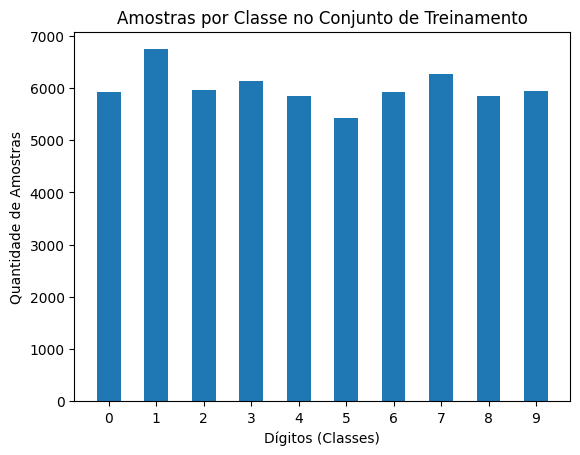

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

print("Carregando o dataset MNIST...")
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Dados de treinamento:",X_train.shape, y_train.shape)
print("Dados de teste:",X_test.shape,y_test.shape)

unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts, 0.5)

plt.xticks(np.arange(0, 10, 1))  # Garante que o 10 apareça

plt.title('Amostras por Classe no Conjunto de Treinamento')
plt.xlabel('Dígitos (Classes)')
plt.ylabel('Quantidade de Amostras')
plt.show()

In [ ]:
# 3. Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# 4. Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. Treinar um modelo de regressão logística
print("Treinando o modelo de regressão logística...")
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs')
log_reg.fit(X_train, y_train)

# 6. Fazer previsões
y_pred = log_reg.predict(X_test)

# 7. Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.4f}")

print("Relatório de classificação:")
print(classification_report(y_test, y_pred))

# 8. Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Não-0', '0'], yticklabels=['Não-0', '0'])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

# 9. Exibir algumas previsões erradas
misclassified = np.where(y_test != y_pred)[0]
if len(misclassified) > 10:
    misclassified = np.random.choice(misclassified, 10, replace=False)

plt.figure(figsize=(10,4))
for i, idx in enumerate(misclassified):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {y_pred[idx]} | Real: {y_test[idx]}")
    plt.axis('off')
plt.show()

print("Exercício concluído! O modelo foi treinado e avaliado com sucesso.")